In [56]:
import cv2
from eval import eval
import matplotlib.pyplot as plt
import numpy as np

In [57]:
def otsu_mask(image):
    _, mask = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return mask

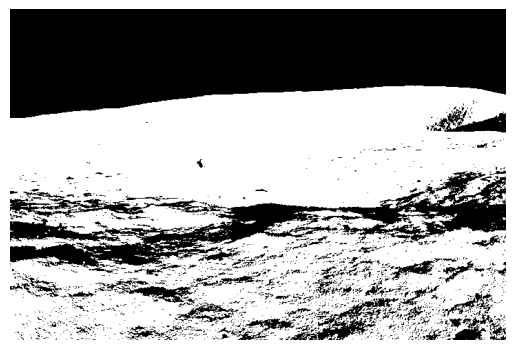

In [58]:
img = cv2.imread('dataset/images/render/render0001.png', cv2.IMREAD_GRAYSCALE)
mask = otsu_mask(img)

plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.show()


In [59]:
images_to_process = ['0001', '0002', '0003', '0004', '0005']

loss = [eval(image, otsu_mask) for image in images_to_process]



In [60]:
def segment_sky(image):
    sky_threshold = 10
    _, mask = cv2.threshold(image, sky_threshold, 255, cv2.THRESH_BINARY)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    
    # return inverse of the mask
    return cv2.bitwise_not(mask)


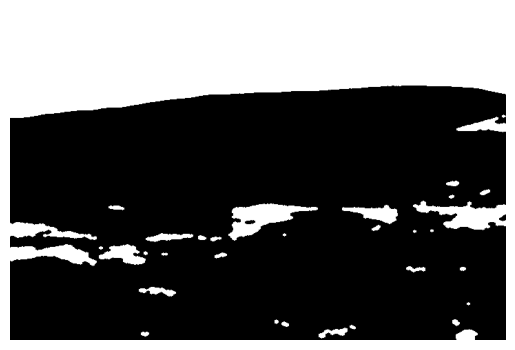

In [61]:
mask = segment_sky(img)
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.show()

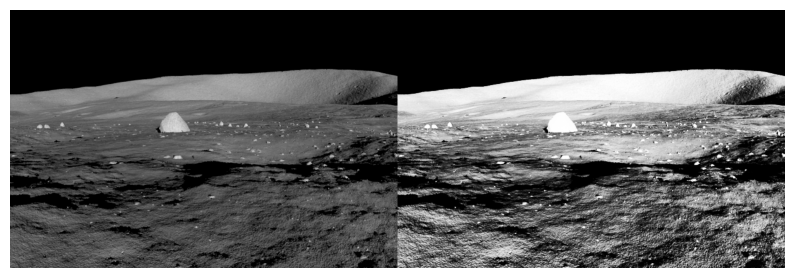

In [62]:
# clahe on image
clahe_img = cv2.equalizeHist(img)

plt.figure(figsize=(10, 5))
plt.axis('off')
plt.imshow(np.hstack((img,clahe_img)), cmap='gray')
plt.show()


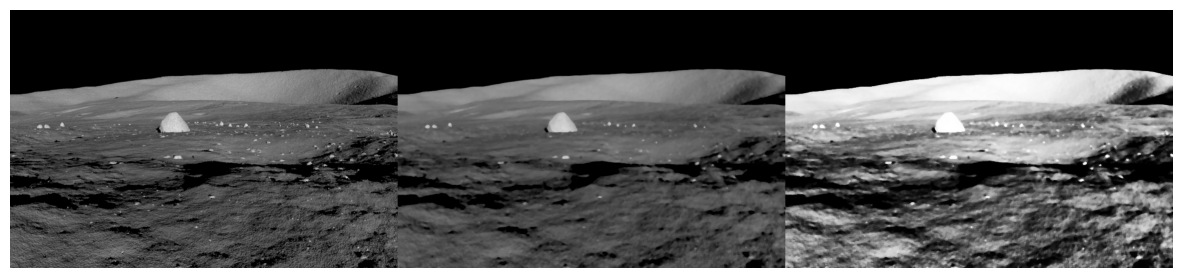

In [63]:
# median filter
median_img = cv2.medianBlur(img, 5)
median_clahed_img = cv2.medianBlur(clahe_img, 5)
plt.figure(figsize=(15, 5))
plt.axis('off')
plt.imshow(np.hstack((img, median_img, median_clahed_img)), cmap='gray')
plt.show()

In [66]:
def high_pass_filter(image):
    # use fft
    fourier = np.fft.fft2(image)
    fourier_shifted = np.fft.fftshift(fourier)

    magnitude = np.abs(fourier_shifted)
    phase = np.angle(fourier_shifted)

    # create a high pass filter
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    radius = 30
    mask = np.ones((rows, cols), dtype=np.uint8)
    cv2.circle(mask, (ccol, crow), radius, 0, -1)

    # apply the mask to the magnitude
    filtered_magnitude = magnitude * mask

    # reconstruct the image
    filtered_fourier = filtered_magnitude * np.exp(1j * phase)
    filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_fourier))
    
    return np.abs(filtered_image)

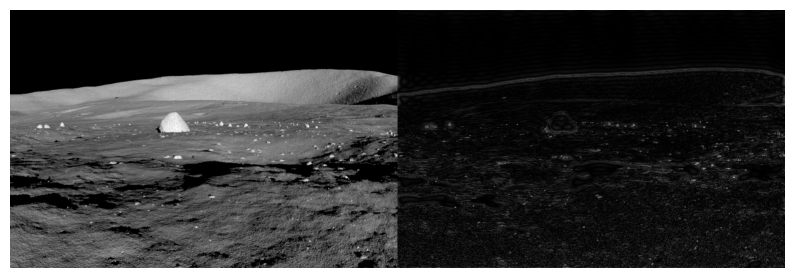

In [67]:
filtered_img = high_pass_filter(img)
plt.figure(figsize=(10, 5))
plt.axis('off')
plt.imshow(np.hstack((img, filtered_img)), cmap='gray')
plt.show()


In [68]:
# otsu mask on filtered image
filtered_mask = otsu_mask(filtered_img)
plt.figure(figsize=(10, 5))
plt.imshow(filtered_mask, cmap='gray')
plt.axis('off')
plt.show()

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/thresh.cpp:1559: error: (-2:Unspecified error) in function 'double cv::threshold(cv::InputArray, cv::OutputArray, double, double, int)'
> THRESH_OTSU mode:
>     'src_type == CV_8UC1 || src_type == CV_16UC1'
> where
>     'src_type' is 6 (CV_64FC1)
